In [1]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('../../fusion'))
sys.path.append(module_path)

In [3]:
from preprocessing_datasets import load_dataset
from embedding_algorithms import sentence_embedding, set_embedding_model
from dimensionality_reduction_algorithms import dimension_reduction_algorithms
from cluster_algorithms import cluster_algorithm

from helper import load_by_index, get_author_candidates
from plot_tools import plotChart, plotCluster

In [4]:
key_values = {
    'model_type':'bilstm',
    'char_level':False,
    'model_version': 2,
    'rnn_dim':1024,
    'verbose':1,
    'attributes_list': ['author','title','big_cate', 'small_cate'],
    'embedding_type': 'inferSent',
    'dataset': 'merged_book-multiAuthors',
    'cluster_method': 'tsne',
    'dimension_reduction': 'pca',
    'num_components': 2,
    'cluster_method': 'hierarchy',
    'num_clusters': 10,
    'block_length_thresold': 0.2,
}

# SETUP INFERSENT

In [5]:
set_embedding_model(key_values)

Vocab size : 2196017
model_version: 2
rnn_dim: 1024
model_type: bilstm
char_level: False
Setup time is: 160.00376200675964


# LOAD

In [6]:
dataset_name, table_group_by_isbn, isbn_list, true_authors = load_dataset(key_values)

dataset: merged_book-multiAuthors
Loading time is: 8.812342882156372


In [7]:
table_ISBN, list_authors, true_author = load_by_index(table_group_by_isbn, isbn_list, true_authors, 0)

ISBN: 1878685546
true author: Alan Shepard, Deke Slayton


In [8]:
#table_ISBN['author'].value_counts()

In [9]:
embeddings_tokens = sentence_embedding(table_ISBN, key_values)

embedding_type: inferSent
attributes_list: ['author', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 2.569727897644043


dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.08676481246948242
rows: 454
classes: 454


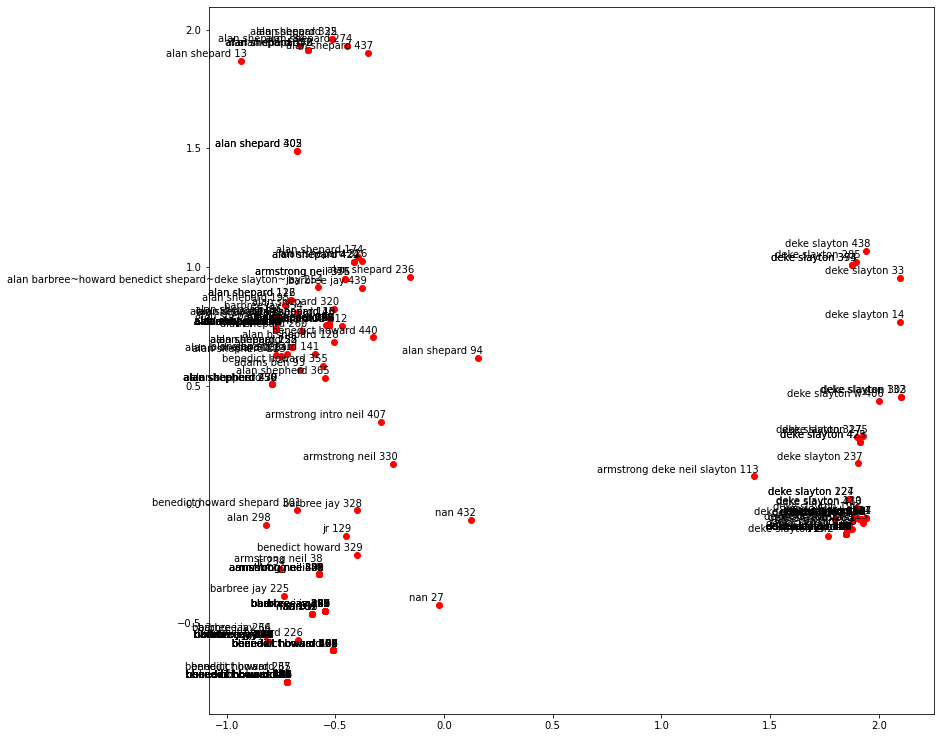

In [10]:
pca_embeddings = dimension_reduction_algorithms(embeddings_tokens, key_values)
plotChart(list_authors, pca_embeddings)

cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.11591696739196777
num of classes: 10


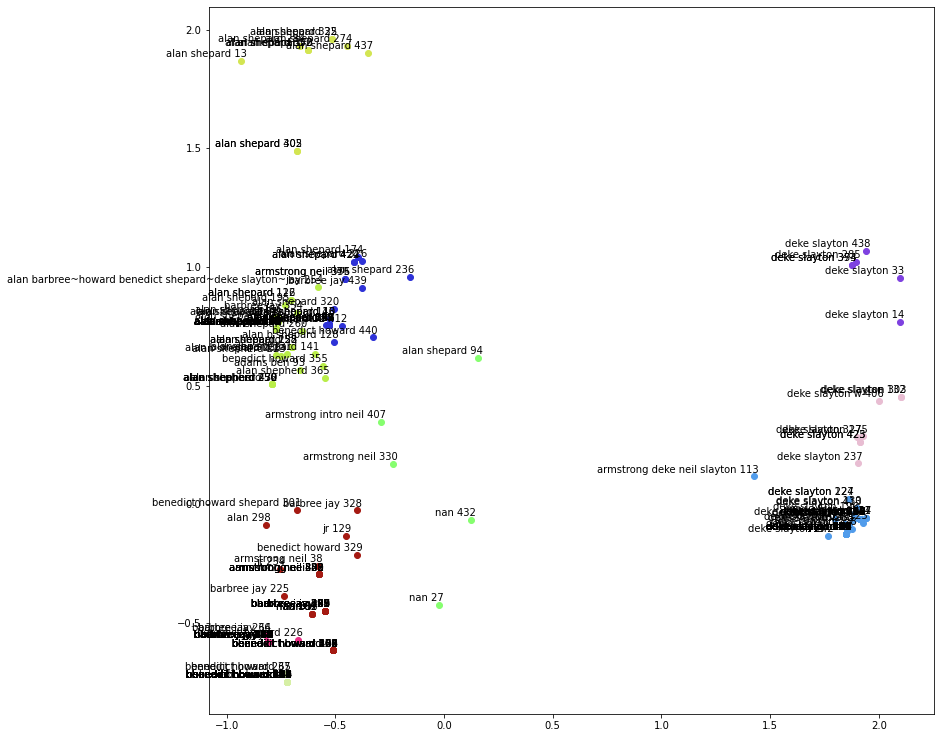

In [11]:
blocks = cluster_algorithm(pca_embeddings, key_values)
plotCluster(blocks, list_authors, key_values['num_clusters'], pca_embeddings)

In [13]:
listCandidates = get_author_candidates(list_authors, blocks, key_values['block_length_thresold'] * len(pca_embeddings))

lengthNecessary: 90.80000000000001


In [14]:
listCandidates

[{'armstrong deke neil slayton': 1, 'deke slayton': 108},
 {'adams ben': 1,
  'alan b shepard': 1,
  'alan barbree~howard benedict shepard~deke slayton~jay': 1,
  'alan shepard': 88,
  'alan shepherd': 6,
  'alan shpard': 1,
  'barbree jay': 1,
  'benedict howard': 1}]

In [16]:
def getFinalAuthors(listCandidates):
    solution = []
    for candidate in listCandidates:
        solution.append(max(candidate, key=candidate.get))
    return solution

In [19]:
print(getFinalAuthors(listCandidates))
print(true_author)

['deke slayton', 'alan shepard']
Alan Shepard, Deke Slayton


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 2<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0394558588
true author: Jimmy Carter, Rosalynn Carter
-------------------------------
tot cases of author's name: 8
-------------------------------
embedding_type: inferSent
attributes_list: ['author', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 1.6783170700073242
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.019012928009033203
rows: 261
classes: 261


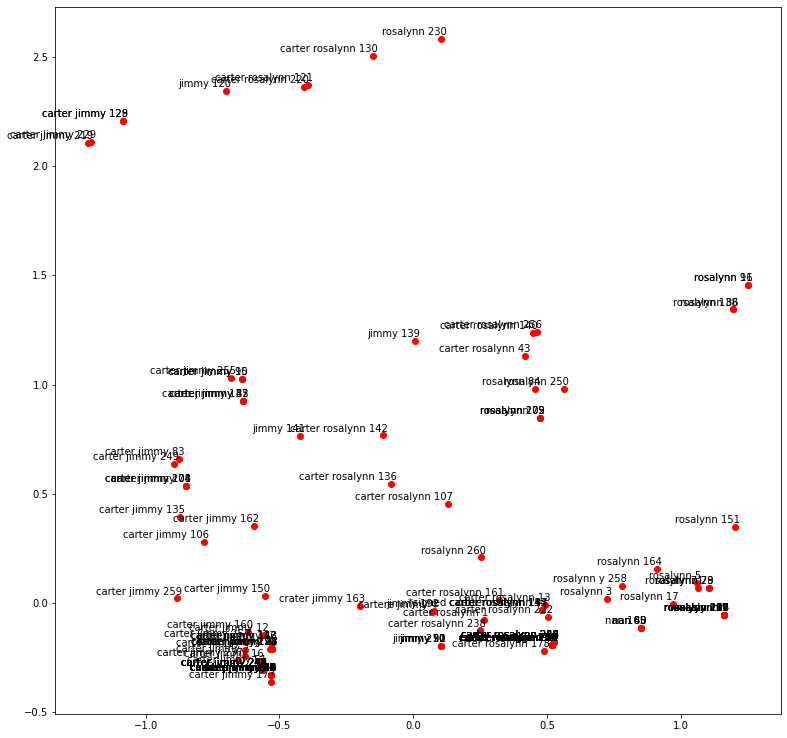

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0040318965911865234
num of classes: 10


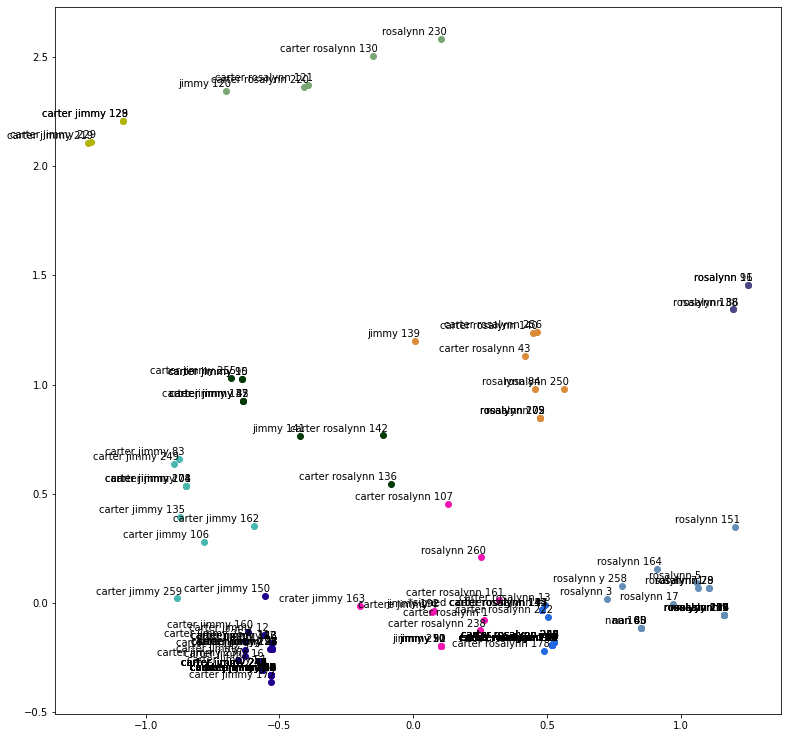

-------------------------------
lengthNecessary: 52.2
[{'carter jimmy': 107}, {'*signed carter rosalynn': 1, 'carter rosalynn': 77}]
['carter jimmy', 'carter rosalynn'] VS true_author: Jimmy Carter, Rosalynn Carter
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 3<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0810932776
true author: Vadim Petrov, Igor Lysenho, Georgy Egorgy
-------------------------------
tot cases of author's name: 29
-------------------------------
embedding_type: inferSent
attributes_list: ['author', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 4.902736186981201
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.03962588310241699
rows: 472
classes: 472


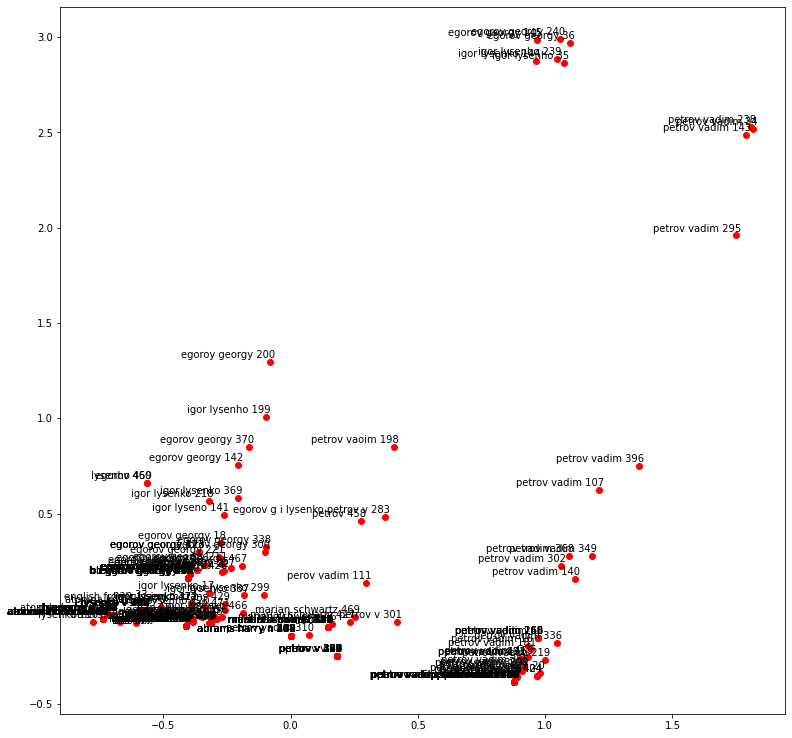

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.00875711441040039
num of classes: 10


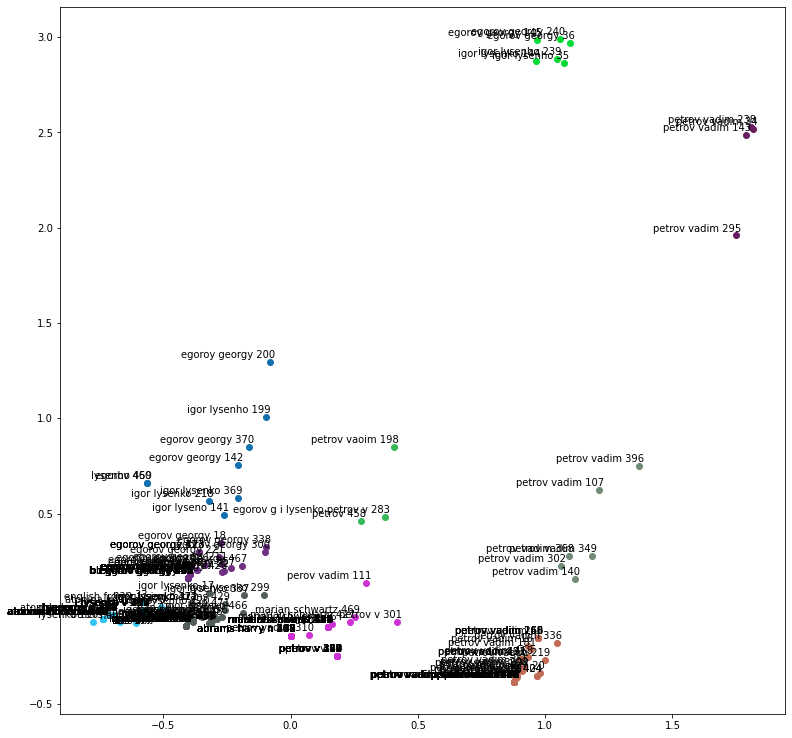

-------------------------------
lengthNecessary: 94.4
[{'petrov vadim': 97, 'petrov vadim vadimovich': 10}, {'antonina bovis': 1, 'egorov georg': 1, 'english from russian to trans': 1, 'igor lysenho': 7, 'igor lysenkho': 1, 'igor lysenki': 6, 'igor lysenko': 70, 'igor lysenko v': 11, 'nan': 1}, {'b egorov georgy': 12, 'egorov georgy': 84}]
['petrov vadim', 'igor lysenko', 'egorov georgy'] VS true_author: Vadim Petrov, Igor Lysenho, Georgy Egorgy
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 4<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0446528382
true author: Jack Welch, John A. Byrne
-------------------------------
tot cases of author's name: 9
-------------------------------
embedding_type: inferSent
attributes_list: ['author', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.8900609016418457
-------------------------------
dimension_reduction: pca
num_components:

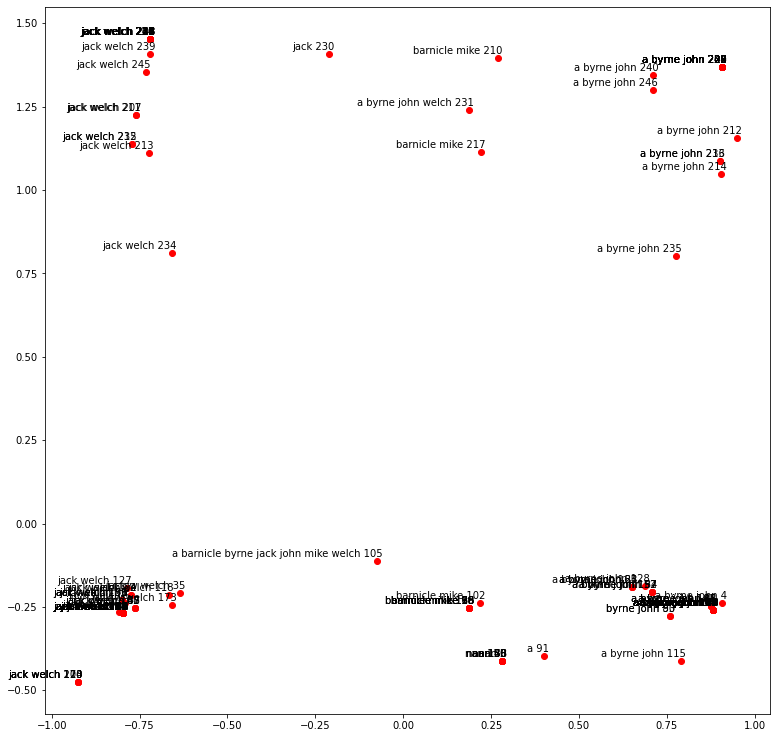

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.004086971282958984
num of classes: 10


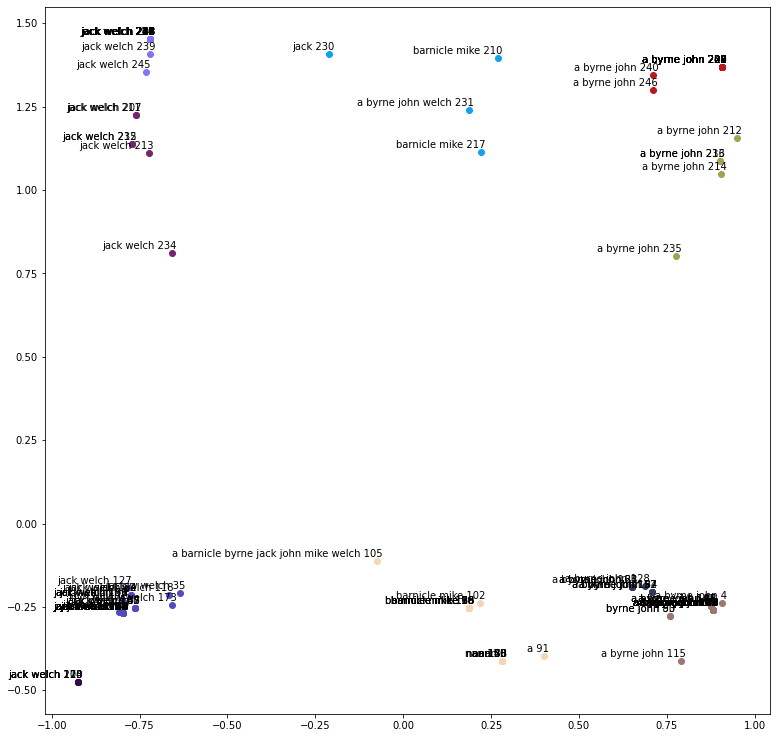

-------------------------------
lengthNecessary: 49.400000000000006
[{'jack w welch': 2, 'jack welch': 94}, {'a byrne john': 78, 'byrne john': 2}]
['jack welch', 'a byrne john'] VS true_author: Jack Welch, John A. Byrne
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 5<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0060852550
true author: Barbara Kingsolver, Steven L. Hopp, Camille Kingsolver
-------------------------------
tot cases of author's name: 9
-------------------------------
embedding_type: inferSent
attributes_list: ['author', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 1.1596362590789795
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.016333818435668945
rows: 319
classes: 319


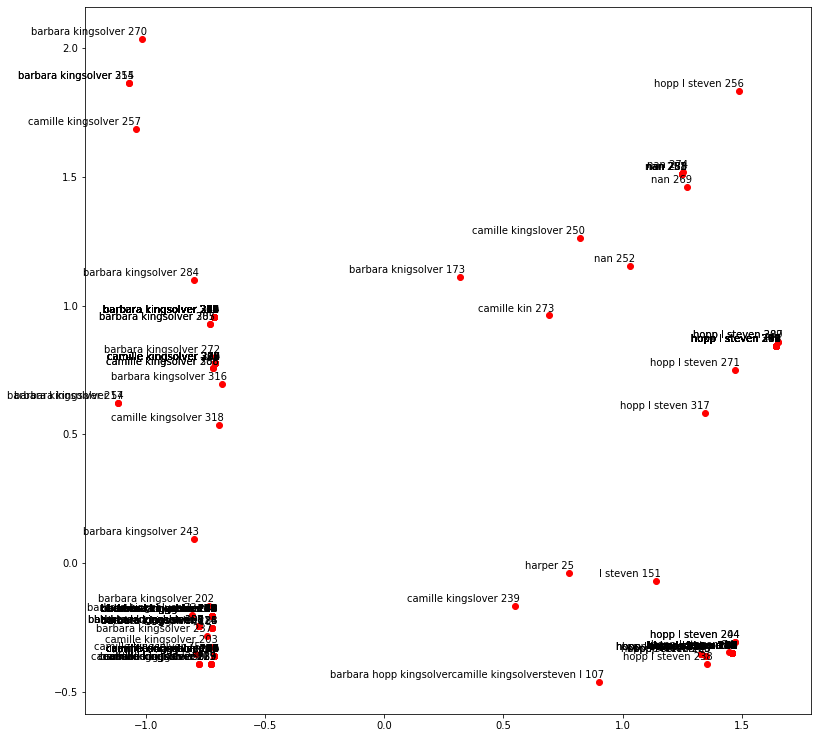

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.003972053527832031
num of classes: 10


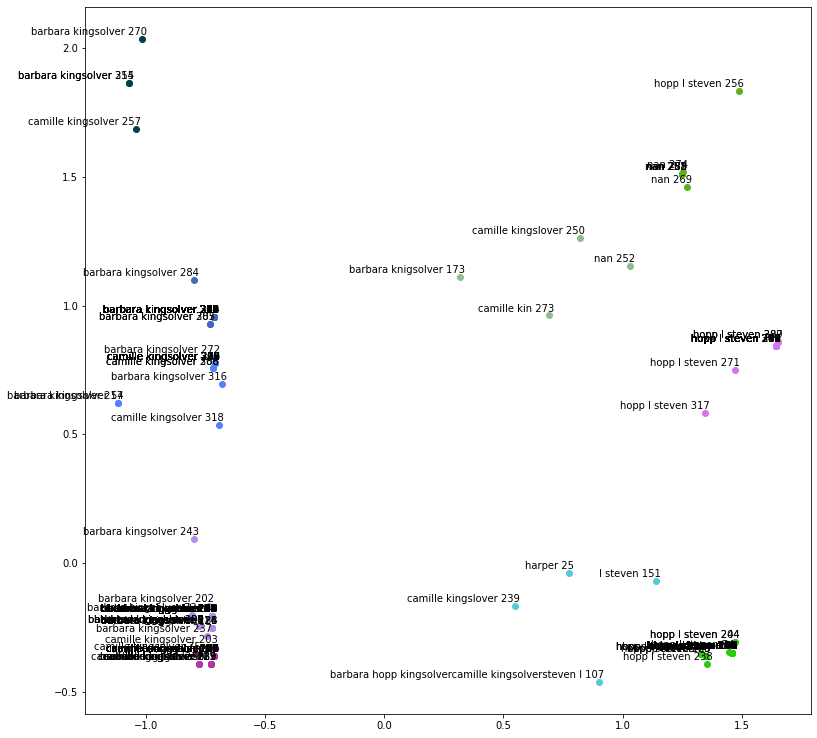

-------------------------------
lengthNecessary: 63.800000000000004
[{'barbara kingsolver': 86}, {'barbara kingsolver': 1, 'camille kingsolver': 77}, {'hopp l steven': 77}]
['barbara kingsolver', 'camille kingsolver', 'hopp l steven'] VS true_author: Barbara Kingsolver, Steven L. Hopp, Camille Kingsolver
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 6<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0679432965
true author: Colin Powell, Joseph E. Persico
-------------------------------
tot cases of author's name: 9
-------------------------------
embedding_type: inferSent
attributes_list: ['author', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.9942729473114014
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.02025914192199707
rows: 226
classes: 226


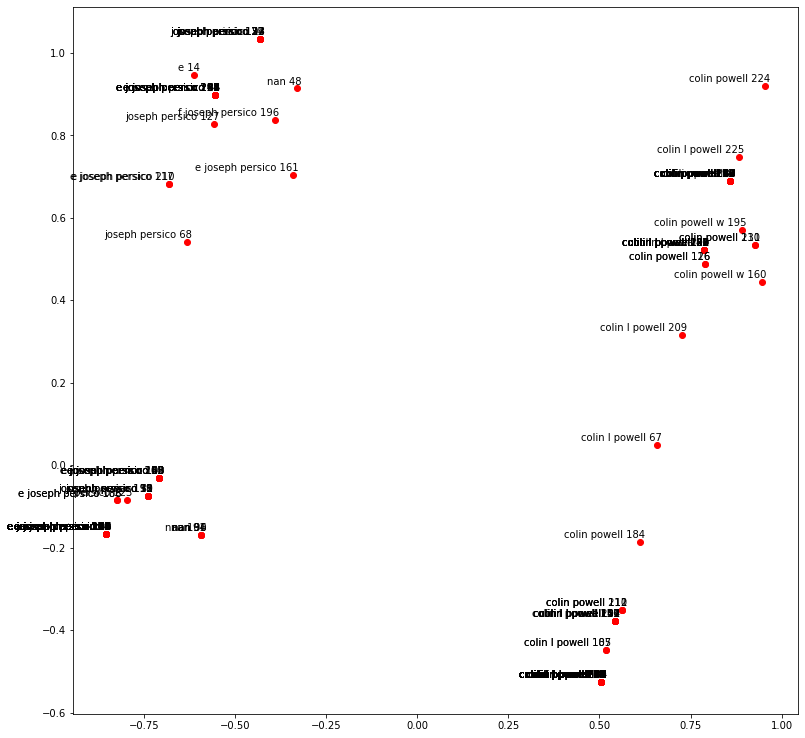

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.003551006317138672
num of classes: 10


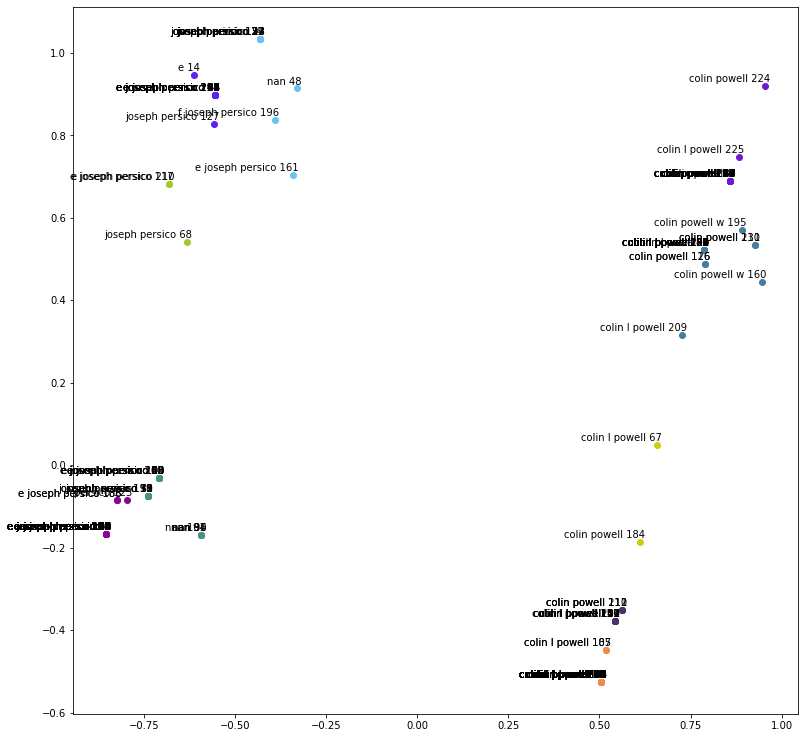

-------------------------------
lengthNecessary: 45.2
[{'colin l powell': 66}, {'e joseph persico': 58, 'persico': 1}]
['colin l powell', 'e joseph persico'] VS true_author: Colin Powell, Joseph E. Persico
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 7<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0060852569
true author: Barbara Kingsolver, Steven L. Hopp, Camille Kingsolver
-------------------------------
tot cases of author's name: 14
-------------------------------
embedding_type: inferSent
attributes_list: ['author', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 1.2361440658569336
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.015611886978149414
rows: 320
classes: 320


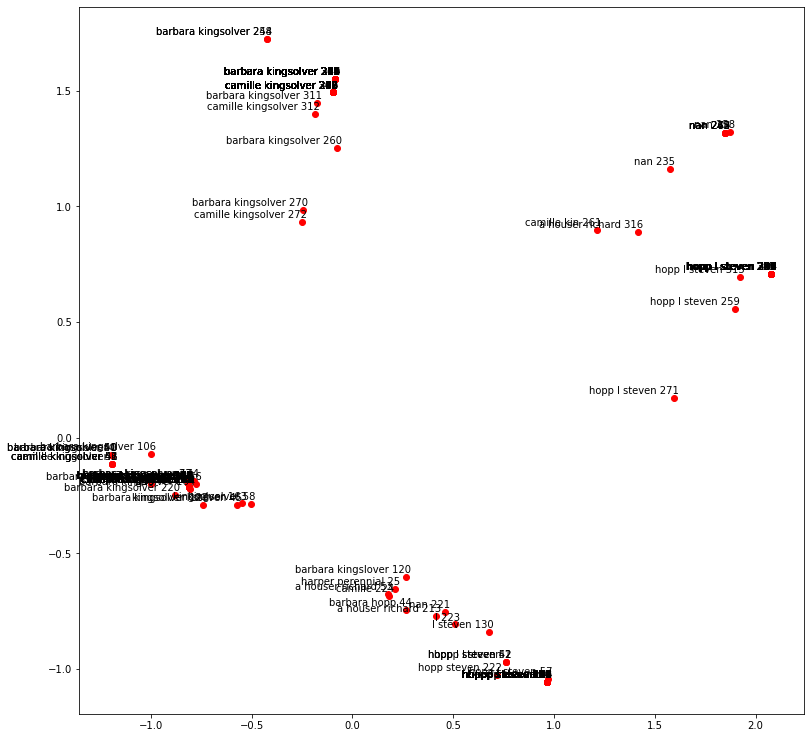

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.003342866897583008
num of classes: 10


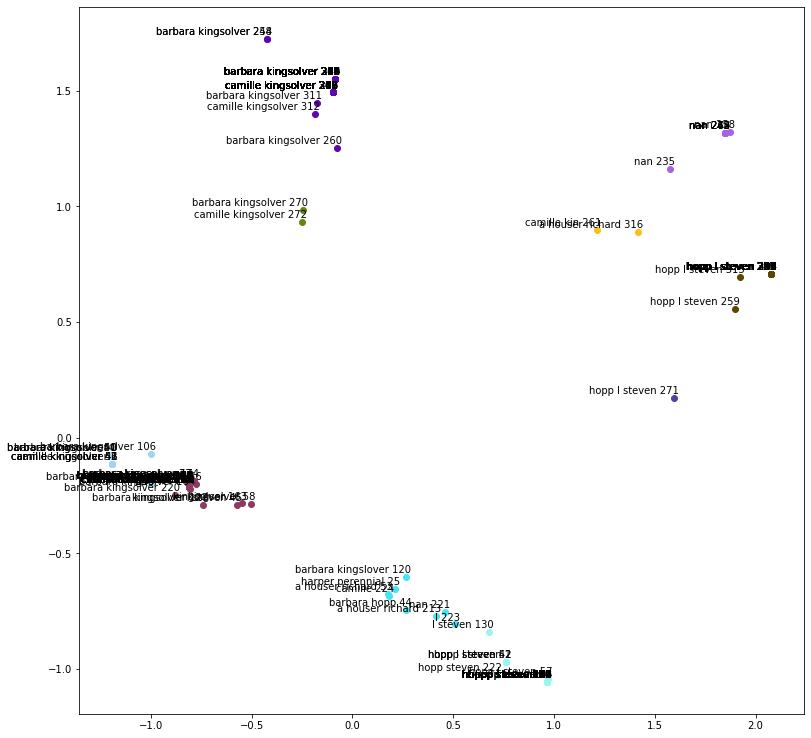

-------------------------------
lengthNecessary: 64.0
[{'barbara kingsolver': 79, 'camille kingsolver': 64, 'kingsolver': 2, 'kingsolver l steven': 1}, {'hopp l steven': 67, 'hopp steven': 1, 'l steven': 1}]
['barbara kingsolver', 'hopp l steven'] VS true_author: Barbara Kingsolver, Steven L. Hopp, Camille Kingsolver
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 8<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0688123163
true author: Ken Blanchard, Sheldon Bowles
-------------------------------
tot cases of author's name: 14
-------------------------------
embedding_type: inferSent
attributes_list: ['author', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 1.1160609722137451
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.029994964599609375
rows: 228
classes: 228


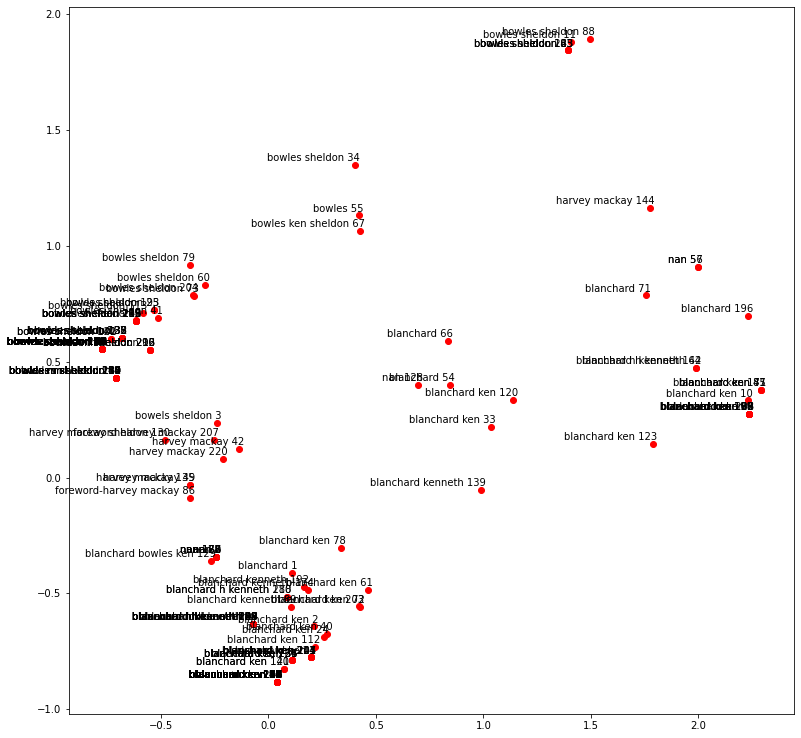

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0021359920501708984
num of classes: 10


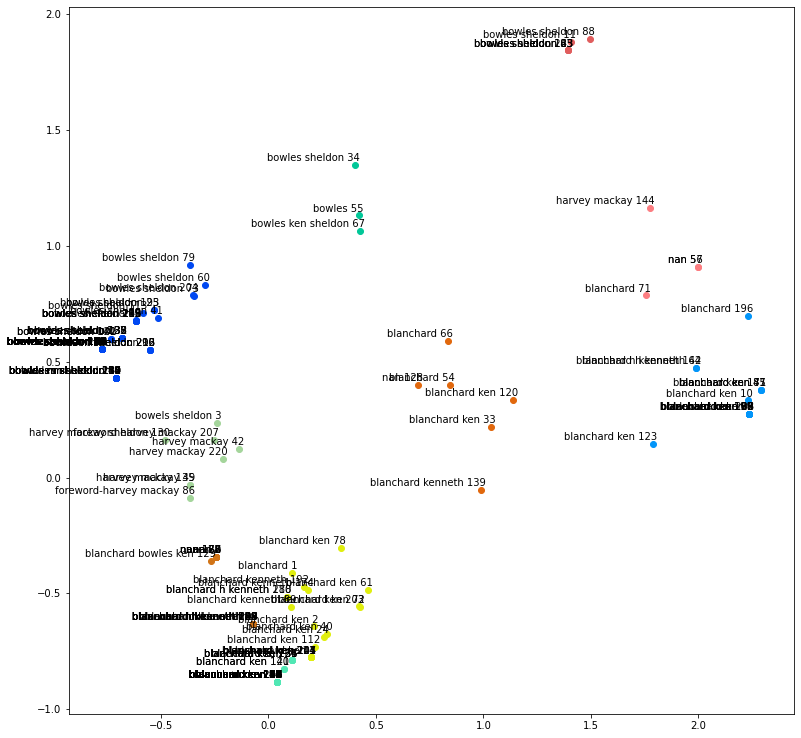

-------------------------------
lengthNecessary: 45.6
[{'bowles m sheldon': 15, 'bowles sheldon': 70}, {'blanchard ken': 61}]
['bowles sheldon', 'blanchard ken'] VS true_author: Ken Blanchard, Sheldon Bowles
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 9<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0399135189
true author: Bob Hope, Melville Shavelson
-------------------------------
tot cases of author's name: 6
-------------------------------
embedding_type: inferSent
attributes_list: ['author', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 1.4435021877288818
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.011430025100708008
rows: 191
classes: 191


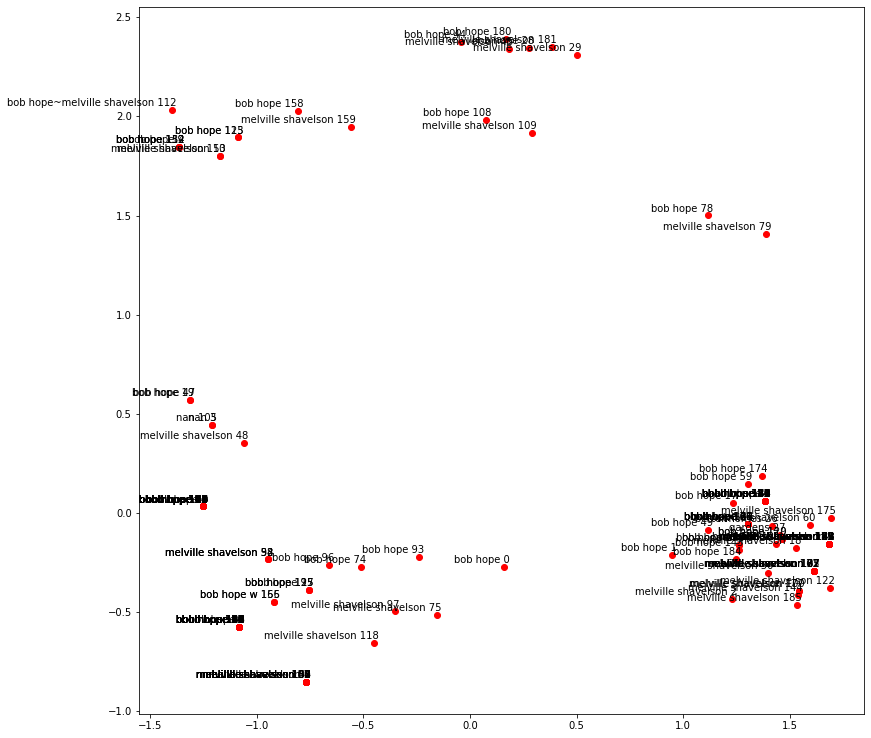

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0021698474884033203
num of classes: 10


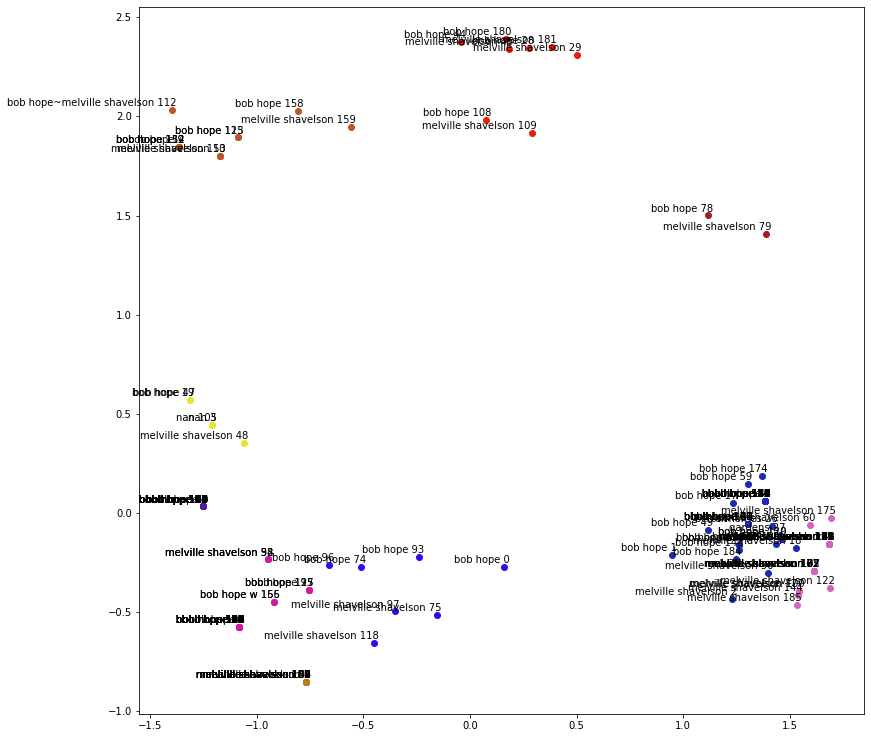

-------------------------------
lengthNecessary: 38.2
[{'better homes': 1, 'bob hope': 38, 'gardens': 1, 'melville shavelson': 3}, {'bob hope': 34, 'bob hope w': 2, 'melville shavelson': 3}]
['bob hope', 'bob hope'] VS true_author: Bob Hope, Melville Shavelson


In [20]:
for index in range(1,9):
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>book number {0}<<<<<<<<<<<<<<<<<<<<<<<<".format(index+1))
    table_ISBN, list_authors, true_author = load_by_index(table_group_by_isbn, isbn_list, true_authors, index)
    print("-------------------------------")
    print("tot cases of author's name: {0}".format(len(table_ISBN['author'].value_counts())))
    print("-------------------------------")
    embeddings_tokens = sentence_embedding(table_ISBN, key_values)
    print("-------------------------------")
    pca_embeddings = dimension_reduction_algorithms(embeddings_tokens, key_values)
    plotChart(list_authors, pca_embeddings)
    print("-------------------------------")
    blocks = cluster_algorithm(pca_embeddings, key_values)
    plotCluster(blocks, list_authors, key_values['num_clusters'], pca_embeddings)
    print("-------------------------------")
    listCandidates = get_author_candidates(list_authors, blocks, key_values['block_length_thresold'] * len(pca_embeddings))
    print(listCandidates)
    print("{0} VS true_author: {1}".format(getFinalAuthors(listCandidates), true_author))